In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import joblib
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
import tensorflow as tf

from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Loading Multiple  CSV
csv1 = pd.read_csv("Data1.csv")
csv1['Person'] = '1'

csv2 = pd.read_csv("Data2.csv")
csv2['Person'] = '2'

csv3 = pd.read_csv("Data3.csv")
csv3['Person'] = '3'

# Combine into one DataFrame
combined_df = pd.concat([csv1, csv2, csv3], ignore_index=True)

# Write to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)

# Preprocessing

In [ ]:
#Load and Display Combined Data
data = pd.read_csv("combined_data.csv")
data.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,124324,124325,124326,124327,124328,124329,124330,124331,124332,124333
ID,-NtRbm_DcFo4HGfcZkay,-NtRbo1VIt2ERLbqS0Hf,-NtRboLy4M2_SDxFFX5L,-NtRbp-ib_C7bf5Y7enP,-NtRbpI-9VoKY9uMQRfq,-NtRbpcNu9jEculqeSW2,-NtRbpzQTip1l6bTCwSD,-NtRbqJcUDI7Yd1K94L_,-NtRbqqD8zf_KeMknrFf,-NtRbrBzW6z3l0_8q3lx,...,-Nu8tiME6dl5ISK6NOCw,-Nu8tkF8EzSzR5alxTJQ,-Nu8tmCCDRaLDzCQL-yY,-Nu8to9IdMXkDs4FyKu7,-Nu8tq6Nn9EO7dHfOTdp,-Nu8ts3Um4Fj1NWOPzmX,-Nu8tu0TRXBdjyqRRtEJ,-Nu8tvyZX-3PEqBFZX_R,-Nu8txvcHcPneDSBxf3z,-Nu8tzshPyqr95_8nJZO
BPM,3.59,12.48,19.71,76.82,24.97,90.77,83.22,90.77,41.01,78.84,...,68.0,71.0,78.0,68.0,71.0,65.0,78.0,75.0,53.0,136.0
Date,"Thursday,-March-21-2024-00:08:37","Thursday,-March-21-2024-00:08:37","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:55","Thursday,-March-21-2024-00:08:55",...,"Friday,-March-29-2024-19:09:45","Friday,-March-29-2024-19:09:54","Friday,-March-29-2024-19:10:02","Friday,-March-29-2024-19:10:10","Friday,-March-29-2024-19:10:18","Friday,-March-29-2024-19:10:26","Friday,-March-29-2024-19:10:34","Friday,-March-29-2024-19:10:42","Friday,-March-29-2024-19:10:50","Friday,-March-29-2024-19:10:58"
Person,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


In [ ]:
# Drop the date column and keep only the time from the 'Date' column
combined_df['Time'] = pd.to_datetime(combined_df['Date']).dt.time
# Drop the 'ID' and 'Date' columns from the DataFrame
combined_df.drop(['ID', 'Date'], axis=1, inplace=True)
# Remove any rows with missing values
combined_df.dropna(inplace=True)
# Convert the time to seconds
combined_df['Time'] = combined_df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
# Save the cleaned DataFrame to a new CSV file
combined_df.to_csv("cleaned_data.csv", index=False)

In [ ]:
# Load the cleaned csv then display it
data = pd.read_csv("cleaned_data.csv")
data[['BPM']].head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
BPM,3.59,12.48,19.71,76.82,24.97,90.77,83.22,90.77,41.01,78.84,...,142.52,22.19,27.24,55.45,46.08,45.35,99.83,18.38,30.26,29.37


In [ ]:
# Set the ranges BPM >= 53 & <= 90.9 and remove the rest
bpm_ranges = [(50, 63, 'Asleep'), (61, 90.9, 'Awake')]
combined_df = combined_df[(combined_df['BPM'] >= 50) & (combined_df['BPM'] <= 90.9)]
# Categorize 'State' based on BPM range
combined_df['State'] = pd.cut(combined_df['BPM'], bins=[r[0] for r in bpm_ranges] + [bpm_ranges[-1][1]], right=False, labels=[r[2] for r in bpm_ranges])
# Save to a new CSV
combined_df.to_csv("sleep_data.csv", index=False)

In [ ]:
# Handles instances where there's continuous Awake and encounters a three instances of Asleep (Vice Versa)
def consolidate_states(states):
    consolidated_states = []
    current_state = None
    consecutive_count = 0
zW
    for state in states:
        if state == current_state:
            consecutive_count += 3
        else:
            if current_state is not None:
                if consecutive_count > 3:
                    consolidated_states.extend([current_state] * consecutive_count)
                else:
                    consolidated_states.append(current_state)

            current_state = state
            consecutive_count = 3

    if current_state is not None:
        if consecutive_count > 3:
            consolidated_states.extend([current_state] * consecutive_count)
        else:
            consolidated_states.append(current_state)

    for i in range(3, len(consolidated_states) - 3):
        if consolidated_states[i] == "Asleep" and consolidated_states[i-3] == consolidated_states[i+1] == "Awake":
            consolidated_states[i] = "Awake"
        elif consolidated_states[i] == "Awake" and consolidated_states[i-3] == consolidated_states[i+1] == "Asleep":
            consolidated_states[i] = "Asleep"

    return consolidated_states

In [ ]:
# Load the Sleep Data CSV and Display
data = pd.read_csv("sleep_data.csv")
data[['BPM', 'State']].head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
BPM,76.82,90.77,83.22,90.77,78.84,88.11,83.22,80.97,78.84,83.22,...,68.1,69.69,65.15,90.77,52.54,53.52,88.11,85.59,80.97,78.74
State,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,...,Awake,Awake,Awake,Awake,Asleep,Asleep,Awake,Awake,Awake,Awake


In [ ]:
# Descriptive statistics of dataset
data.describe()

,BPM,Person,Time
count,91459.000000,91459.000000,91459.000000
mean,59.076990,2.017166,27929.021026
std,8.604493,0.397941,14579.430495
min,50.000000,1.000000,400.000000
25%,53.380000,2.000000,17285.000000
50%,56.390000,2.000000,25817.000000
75%,59.760000,2.000000,34168.000000
max,90.770000,3.000000,86270.000000


In [ ]:
# Splitting the Data
X = data[['BPM']]
y = data['State']

In [ ]:
# Consolidate states
consolidated_y = consolidate_states(y)

In [ ]:
# Save consolidated states to a CSV file
consolidated_data = pd.DataFrame({'BPM': X['BPM'], 'States': consolidated_y})
consolidated_data.to_csv('modified_states.csv', index=False)

In [ ]:
# Using Label Encoder for "State" Variable
le = LabelEncoder()
y = le.fit_transform(consolidated_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# Print the first few rows of each
print("\nFirst 5 rows of X_train:")
print(X_train[:20])

print("\nFirst 5 rows of y_train:")
print(y_train[:20])

print("\nFirst 5 rows of X_test:")
print(X_test.head())

print("\nFirst 5 rows of y_test:")
print(y_train[:5])


First 5 rows of X_train:
         BPM
88817  57.00
77564  56.39
53647  55.35
63562  55.35
16293  57.47
34230  58.59
22926  54.35
27534  59.82
30025  52.40
62511  69.52
33157  58.65
76164  57.47
58651  53.38
19482  50.63
75104  56.39
27715  54.35
75814  53.33
41174  59.76
89757  78.00
48147  62.31

First 5 rows of y_train:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]

First 5 rows of X_test:
         BPM
62181  59.76
54900  55.35
87190  57.00
73137  59.82
78706  54.35

First 5 rows of y_test:
[0 0 0 0 0]


In [ ]:
# Normalize the  data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.24223518]
 [-0.31296411]
 [-0.43355113]
 ...
 [ 0.08474116]
 [ 2.29009224]
 [-0.66197077]]
[[ 0.07778422]
 [-0.43355113]
 [-0.24223518]
 ...
 [-0.18773913]
 [-0.97503323]
 [ 0.68651677]]


# Logistic Regression

In [ ]:
# Train Logistic Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Cross validation - Five Folds
lr_cv_accuracy = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_cv_predictions = cross_val_predict(lr_model, X_train, y_train, cv=5)
# Confusion Matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_train, lr_cv_predictions)

Conversion to TFLite

In [ ]:
!pip install scikit-learn==1.4.0


In [ ]:
#Load Scikit
model = joblib.load('lr_model.pkl')

In [ ]:
# Extract coefficients and intercept
weights = model.coef_
bias = model.intercept_

In [ ]:
# Create a TensorFlow model
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(len(weights),), kernel_initializer=tf.constant_initializer(weights),
                          bias_initializer=tf.constant_initializer(bias))
])

# Compile the model (you can adjust optimizer and loss as per your needs)
tf_model.compile(optimizer='sgd', loss='mse')

In [ ]:
#Tensorflow Model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

In [ ]:
# Save the TFLite to a file
with open('sleep_lr.tflite', 'wb') as f:
    f.write(tflite_model)

START


In [ ]:
# Consolidate states function
def consolidate_states(states):
    consolidated_states = []
    current_state = None
    consecutive_count = 0

    for state in states:
        if state == current_state:
            consecutive_count += 1
        else:
            if current_state is not None:
                if consecutive_count > 1:
                    consolidated_states.extend([current_state] * consecutive_count)
                else:
                    consolidated_states.append(current_state)

            current_state = state
            consecutive_count = 1

    if current_state is not None:
        if consecutive_count > 1:
            consolidated_states.extend([current_state] * consecutive_count)
        else:
            consolidated_states.append(current_state)

    # Update singular occurrences based on surrounding states
    for i in range(1, len(consolidated_states) - 1):
        if consolidated_states[i] == "Asleep" and consolidated_states[i-1] == consolidated_states[i+1] == "Awake":
            consolidated_states[i] = "Awake"
        elif consolidated_states[i] == "Awake" and consolidated_states[i-1] == consolidated_states[i+1] == "Asleep":
            consolidated_states[i] = "Asleep"

    return consolidated_states

In [ ]:
# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="sleep_lr.tflite")
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Print first 10 rows of 'BPM' column
print("Original 'BPM' values:")
print(data['BPM'].head(10))

Original 'BPM' values:
0     3.59
1    12.48
2    19.71
3    76.82
4    24.97
5    90.77
6    83.22
7    90.77
8    41.01
9    78.84
Name: BPM, dtype: float64


In [ ]:
# Set the BPM ranges
bpm_ranges = [(50, 60, 'Asleep'), (61, 90.9, 'Awake')]
# Filter data for BPM between 50 and 90.9
filtered_data = data[(data['BPM'] >= 50) & (data['BPM'] <= 90.9)]


In [ ]:

# Categorize 'State' based on BPM range
filtered_data['State'] = pd.cut(filtered_data['BPM'],
                               bins=[r[0] for r in bpm_ranges] + [bpm_ranges[-1][1]],
                               right=False,
                               labels=[r[2] for r in bpm_ranges])

# Fit LabelEncoder on original 'State' labels
le = LabelEncoder()
le.fit(filtered_data['State'])
# Print first 10 rows of updated 'State' and 'BPM' columns
print("\nFiltered 'BPM' and 'State' values:")
print(filtered_data[['BPM', 'State']].head(10))


Filtered 'BPM' and 'State' values:
      BPM  State
3   76.82  Awake
5   90.77  Awake
6   83.22  Awake
7   90.77  Awake
9   78.84  Awake
10  88.11  Awake
11  83.22  Awake
12  80.97  Awake
13  78.84  Awake
14  83.22  Awake


In [ ]:

# Save to a new CSV
filtered_data.to_csv("sleep_data_cleaned_NoState.csv", index=False)

print("\nFiltered data saved to sleep_data.csv")


Filtered data saved to sleep_data.csv


In [ ]:
# Select the 'BPM' column
X_new = filtered_data[['BPM']]
print(X_new)

          BPM
3       76.82
5       90.77
6       83.22
7       90.77
9       78.84
...       ...
124261  71.00
124262  65.00
124263  78.00
124264  75.00
124265  53.00

[91459 rows x 1 columns]


In [ ]:
# Reshape X to match expected input shape for TFLite model
X_np = X.values.reshape(-1, 1, 1).astype(np.float32)

In [ ]:
# Initialize an empty list to collect predictions
y_pred_tflite_list = []

# Process each value in the batch
for x in X_np:
    # Reshape the individual value to [1, 1]
    x_reshaped = x.reshape((1, 1))

    # Set tensor and invoke inference
    interpreter.set_tensor(input_details[0]['index'], x_reshaped)
    interpreter.invoke()

    # Get the prediction
    output = interpreter.get_tensor(output_details[0]['index'])
    # Append the prediction to the list
    y_pred_tflite_list.append(output.squeeze())

# Convert list to numpy array
y_pred_binary = np.array(y_pred_tflite_list).astype(int)

# Print first 10 binary predictions
print("First 10 binary predictions from TFLite model:")
print(y_pred_binary[:10])


First 10 binary predictions from TFLite model:
[293 347 318 347 301 337 318 309 301 318]


In [ ]:
import numpy as np

# Convert y_pred_tflite_list to a numpy array
y_pred_tflite_array = np.array(y_pred_tflite_list)

# Apply threshold to convert probabilities to binary labels
y_pred_binary = (y_pred_tflite_array >= 0.5).astype(int)

# Print first 10 binary predictions
print("First 10 binary predictions from TFLite model:")
print(y_pred_binary[:10])


First 10 binary predictions from TFLite model:
[1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Map binary predictions to original labels
predicted_labels = np.where(y_pred_binary == 1, 'Awake', 'Asleep')

# Print first 10 predicted labels
print("First 10 predicted labels from TFLite model:")
print(predicted_labels[:10])


First 10 predicted labels from TFLite model:
['Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake' 'Awake'
 'Awake']


In [ ]:
# Define batch size
batch_size = 1000  # You can adjust this number based on your system's memory capacity

# Initialize an empty list to collect predictions
y_pred_tflite_list = []

In [ ]:
# Process each value in the batch
for x in X_np:
    # Reshape the individual value to [1, 1]
    x_reshaped = x.reshape((1, 1))

In [ ]:
# Run inference and get predictions
interpreter.set_tensor(input_details[0]['index'], x_reshaped)
interpreter.invoke()
y_pred_tflite = interpreter.get_tensor(output_details[0]['index']).squeeze()

print("First 10 predictions from TFLite model:")
print(y_pred_tflite)

First 10 predictions from TFLite model:
201.89882


In [ ]:
# Set tensor and invoke inference
interpreter.set_tensor(input_details[0]['index'], x_reshaped)
interpreter.invoke()

In [ ]:
# Get the prediction
output = interpreter.get_tensor(output_details[0]['index'])
print(output)

201.89882


In [ ]:
# Apply threshold to convert probabilities to binary labels
y_pred_binary = (y_pred_tflite >= 0.5).astype(int)

print("First 10 binary predictions from TFLite model:")
print(y_pred_binary[:10])

First 10 binary predictions from TFLite model:


IndexError: invalid index to scalar variable.

[[201.89882]]


In [ ]:
# Append the prediction to the list
y_pred_tflite_list.append(output.squeeze())

In [ ]:
# Convert the list to a numpy array
y_pred_tflite_list = np.array(y_pred_tflite_list)
print(y_pred_tflite_list)

[201.89882]


In [ ]:
# Consolidate states
consolidated_states = consolidate_states(y_pred_tflite_list)
print(consolidate_states)

<function consolidate_states at 0x7da854db17e0>


In [ ]:
# Handle unseen labels by setting them to 'UNKNOWN'
filtered_data['Encoded_State'] = le.fit_transform(filtered_data['State'])

# Print unique labels in the encoded 'State'
print("Unique labels in the encoded 'State':", le.classes_)

Unique labels in the encoded 'State': ['Asleep' 'Awake']


In [ ]:
# Convert predictions to the original label using LabelEncoder
y_pred_np = np.array(y_pred_tflite_list).round().astype(int)

In [ ]:
# Filter out unknown labels
filtered_indices = np.isin(y_pred_np, le.classes_)
y_pred_labels_original = le.inverse_transform(y_pred_np[filtered_indices])

In [ ]:
# Replace filtered indices with the predicted labels
y_pred_filtered = np.full(y_pred_np.shape[0], fill_value='UNKNOWN', dtype=object)
y_pred_filtered[filtered_indices] = y_pred_labels_original

In [ ]:
# If y_pred_filtered is a single value, repeat it to match the length of X_new
if len(y_pred_filtered) == 1:
    y_pred_filtered = [y_pred_filtered[0]] * len(X_new)
elif len(y_pred_filtered) != len(X_new):
    raise ValueError(f"Length of y_pred_filtered ({len(y_pred_filtered)}) does not match length of X_new ({len(X_new)})")

In [ ]:
# Create a new DataFrame to store the predicted data
predicted_data = X_new.copy()

In [ ]:
# Add predictions to the new DataFrame
predicted_data['Predicted_State'] = predicted_labels

In [ ]:
# Save to a new CSV
predicted_data.to_csv("predicted_data.csv", index=False)
print("Predictions saved to predicted_data.csv")

Predictions saved to predicted_data.csv


END


In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the labels to numeric format
y_test_numeric = le.fit_transform(y_test_original)
y_pred_tflite_numeric = le.transform(y_pred_tflite_original)

# Evaluate the TFLite model
mse_tflite = mean_squared_error(y_test_numeric, y_pred_tflite_numeric)
r2_tflite = r2_score(y_test_numeric, y_pred_tflite_numeric)
print(f"TFLite Model - MSE: {mse_tflite}, R^2: {r2_tflite}")

TFLite Model - MSE: 0.18762300459217143, R^2: -0.23095558546433326


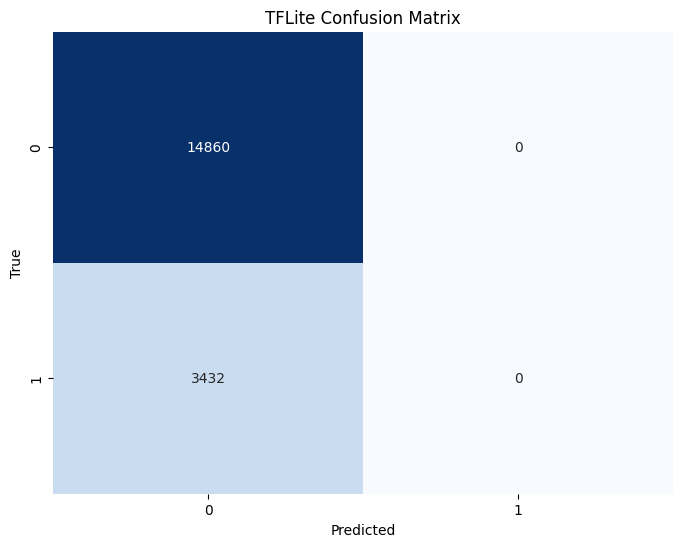

In [ ]:
# Confusion Matrix for TFLite Model
tflite_conf_matrix = confusion_matrix(y_test_original, y_pred_tflite_original)
plt.figure(figsize=(8, 6))
sns.heatmap(tflite_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("TFLite Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

TestTFLite

In [ ]:
# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="sleep_lr.tflite")
interpreter.allocate_tensors()

In [ ]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Load the data
data = pd.read_csv("cleaned_dataNoState.csv")

In [ ]:
# Assuming 'BPM' column is the feature you want to predict on
X = data[['BPM']]

In [ ]:
# Preprocess the data
X_np = X.values.astype(np.float32)
X_np = X_np.reshape((X_np.shape[0], -1))

In [ ]:
# Reshape X_np to match the expected input shape
X_np_reshaped = X_np[:1].reshape((1, 1)).astype(np.float32)

# Check the shape after reshaping
print("Shape of X_np_reshaped:", X_np_reshaped.shape)


Shape of X_np_reshaped: (1, 1)


In [ ]:
print("Shape of X_np:", X_np.shape)


Shape of X_np: (124267, 1)


In [ ]:
# Run inference
interpreter.set_tensor(input_details[0]['index'], X_np_reshaped)
interpreter.invoke()
y_pred_tflite = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
# Fit the LabelEncoder on the original labels
le.fit(y_test_original)

NameError: name 'y_test_original' is not defined

In [ ]:
# Convert predictions to original format
# Assuming a threshold of 0.5 for binary classification
y_pred_labels = (y_pred_tflite >= 0.5).astype(int)


In [ ]:
# Convert predictions to 'Asleep' and 'Awake' labels
le = LabelEncoder()
y_pred_labels_original = le.inverse_transform(y_pred_labels.squeeze())

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:

# Add predictions to the DataFrame or save them
data['Predicted_State'] = y_pred_labels_original
data.to_csv("predicted_data.csv", index=False)

print("Predictions saved to predicted_data.csv")

## Evaluation Metrics


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     59350
           1       0.92      0.86      0.89     13817

    accuracy                           0.96     73167
   macro avg       0.94      0.92      0.93     73167
weighted avg       0.96      0.96      0.96     73167



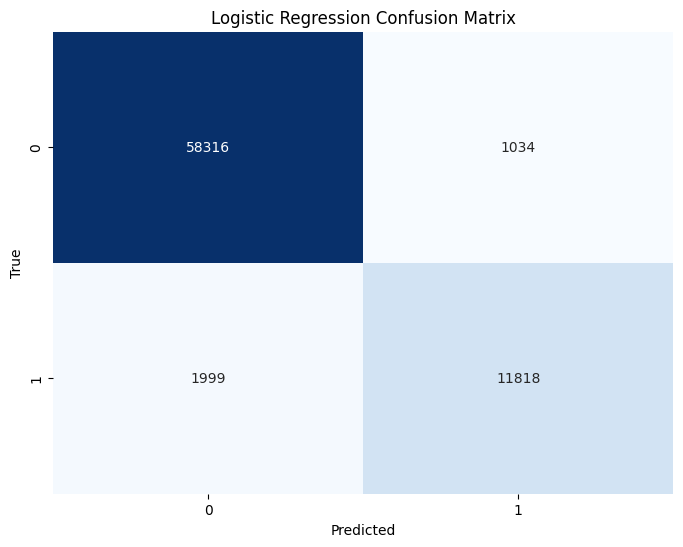


Cross-Validation Results for Logistic Regression:
Mean Accuracy: 95.85%
Standard Deviation: 0.12
Accuracy of the model on the test set: 95.65%


In [ ]:
lr_precision = precision_score(y_train, lr_cv_predictions)
lr_recall = recall_score(y_train, lr_cv_predictions)
lr_f1 = f1_score(y_train, lr_cv_predictions)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_train, lr_cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cross-validation results
print("\nCross-Validation Results for Logistic Regression:")
print(f"Mean Accuracy: {lr_cv_accuracy.mean()*100:.2f}%")
print(f"Standard Deviation: {lr_cv_accuracy.std()*100:.2f}")
print(f"Accuracy of the model on the test set: {lr_model.score(X_test, y_test)*100:.2f}%")

# Decision Tree Model

In [ ]:
# Train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Cross-validation
dt_cv_accuracy = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_cv_predictions = cross_val_predict(dt_model, X_train, y_train, cv=5)

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_train, dt_cv_predictions)

## Evaluation Metrics

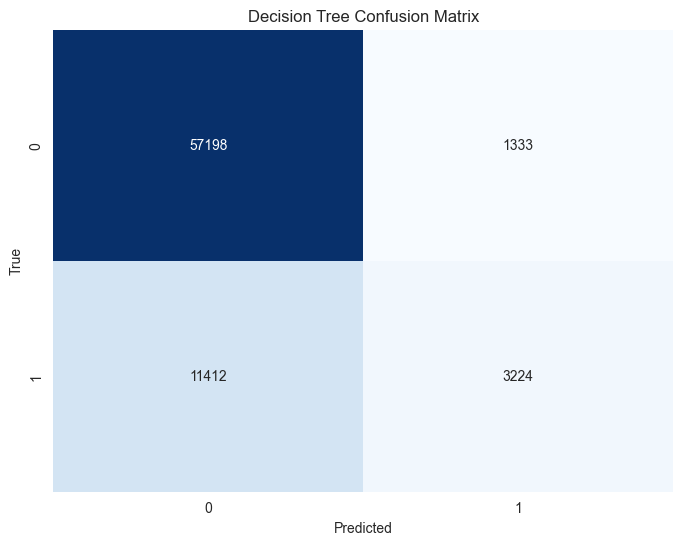


Cross-Validation Results for Decision Tree:
Mean Accuracy: 82.58%
Standard Deviation: 0.19
Accuracy of the model on the test set: 82.97%

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     58531
           1       0.71      0.22      0.34     14636

    accuracy                           0.83     73167
   macro avg       0.77      0.60      0.62     73167
weighted avg       0.81      0.83      0.79     73167


In [ ]:
dt_precision = precision_score(y_train, dt_cv_predictions)
dt_recall = recall_score(y_train, dt_cv_predictions)
dt_f1 = f1_score(y_train, dt_cv_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cross-validation results
print("\nCross-Validation Results for Decision Tree:")
print(f"Mean Accuracy: {dt_cv_accuracy.mean()*100:.2f}%")
print(f"Standard Deviation: {dt_cv_accuracy.std()*100:.2f}")
print(f"Accuracy of the model on the test set: {dt_model.score(X_test, y_test)*100:.2f}%")
print("\nClassification Report for Decision Tree:")
print(classification_report(y_train, dt_cv_predictions))

# Saving The Trained  LR Model

In [ ]:
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']